In [105]:
import pandas as pd
import numpy as np

import matplotlib as mlt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

from catboost import CatBoostRegressor

from xgboost import XGBRegressor

In [106]:
df=pd.read_csv('data/student.csv')

In [107]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [108]:
X=df.drop(columns=['math_score'],axis=1)

In [109]:
Y=df['math_score']

In [110]:
print("Categories in gender:", X['gender'].unique())
print("Categories in race_ethnicity:", X['race_ethnicity'].unique())
print("Categories in parental_level_of_education:", X['parental_level_of_education'].unique())
print("Categories in lunch:", X['lunch'].unique())
print("Categories in test_preparation_course:", X['test_preparation_course'].unique())

Categories in gender: ['female' 'male']
Categories in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test_preparation_course: ['none' 'completed']


In [111]:
 # Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [112]:
numeric_transformer = StandardScaler()
OneHot_transformer = OneHotEncoder()

In [113]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",OneHot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [114]:
X1 = preprocessor.fit_transform(X)

In [115]:
# select test train dataset
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X1,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_test.shape

((800, 19), (200, 19), (200,))

#### CREATE ONE EVALUATE FUNCTION WHICH SHOWS METRICS AFTER MODEL TRAINING

In [117]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2s=r2_score(true, predicted)
    return mae, mse, rmse, r2s

In [118]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Nearest Neighbors":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "Cat Boost":CatBoostRegressor(),
    "Ada Boost":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, Y_train)         ##### TRAIN THE MODELS

    #### MAKE PREDICTION BASED ON THE MODEL TRAINED ABOVE:
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)

    #### EVALUATE THE MODELS THAT WAS TRAINED AND TEST
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2s=evaluate_model(Y_train,Y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2s=evaluate_model(Y_test,Y_test_pred)

    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2s))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2s))
    r2_list.append(model_test_r2s)

    print('\n')


LinearRegression
Model performance for Training set
- Mean Absolute Error: 4.2723
- Mean Squared Error: 28.5176
- Root Mean Squared Error: 5.3402
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2253
- Mean Squared Error: 29.3913
- Root Mean Squared Error: 5.4214
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- Root Mean Squared Error: 6.5938
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- Root Mean Squared Error: 6.5197
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- Root Mean Squared Error: 5.3904
- R2 

In [119]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879216
5,Random Forest,0.853881
8,Ada Boost,0.851659
7,Cat Boost,0.851632
6,XGBoost,0.827797
1,Lasso,0.825320
3,K-Nearest Neighbors,0.783497
4,Decision Tree,0.756368


In [123]:
lin_reg_model=LinearRegression(fit_intercept=True)
lin_reg_model1=lin_reg_model.fit(X_train, Y_train)
y_pred=lin_reg_model1.predict(X_test)
r2s=r2_score(Y_test,y_pred)*100
print("Accuracy of the model is %.2f" %r2s)

Accuracy of the model is 87.92


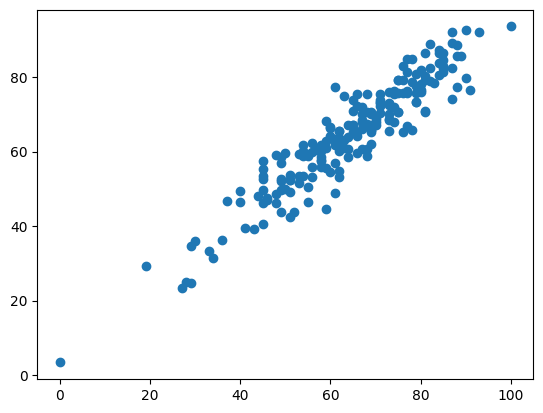

In [126]:
from matplotlib import pyplot
pyplot.scatter(Y_test, y_pred)

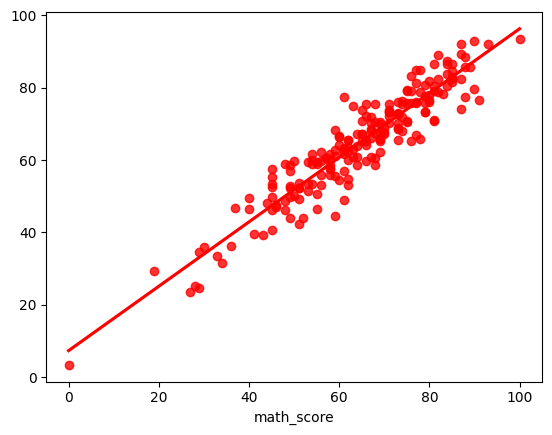

In [128]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [129]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
